<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/Clustering_PCA_vs_RAW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porqué usar PCA? 

Comparemos la misma técnica de clustering aplicada a los datos crudos o a los datos proyectados a un espacio PCA de dimensionalidad reducida. Se evalúa la 
concordancia entre los clústeres identificados en cada caso y las etiquetas de clase de los datos originales. Los pasos a seguir son los siguientes:


1. Cargar datos mpg, eliminar variables no numéricas y eliminar observaciones con NaNs

2. Aplicar GMM a los datos y visualizar con un pairplot

3. Calcular el Rand Adjusted Index para comparar el resultado del clustering con las etiquetas de clase de los datos originales (origin)

4. Aplicar PCA a mpg y obtener la proyección de los datos en el espacio PCA de dimensionalidad reducida

5. Aplicar GMM a los datos PCA de dimensionalidad reducida y visualizar con un pairplot

6. Calcular el Rand Adjusted Index para comparar el resultado del clustering trs PCA con las etiquetas de clase de los datos originales (origin)



1. Cargar datos mpg, eliminar variables no numéricas y eliminar observaciones con NaNs

In [47]:
import pandas as pd 
import seaborn as sns 
import numpy as np

mpg = sns.load_dataset("mpg")
mpg_nonans = mpg.dropna() # remove observations with NaNs

mpg_num_nonans = mpg_nonans.select_dtypes(include='number') # keep only numeric variables (that removes the class variable 'origin')

X = np.array(mpg_num_nonans) # data
y = mpg_nonans['origin'].values # class label

In [42]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


2. Aplicar GMM a los datos y visualizar con un pairplot

In [36]:
from sklearn import mixture
import matplotlib.pyplot as plt

clust_gmm = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(X)


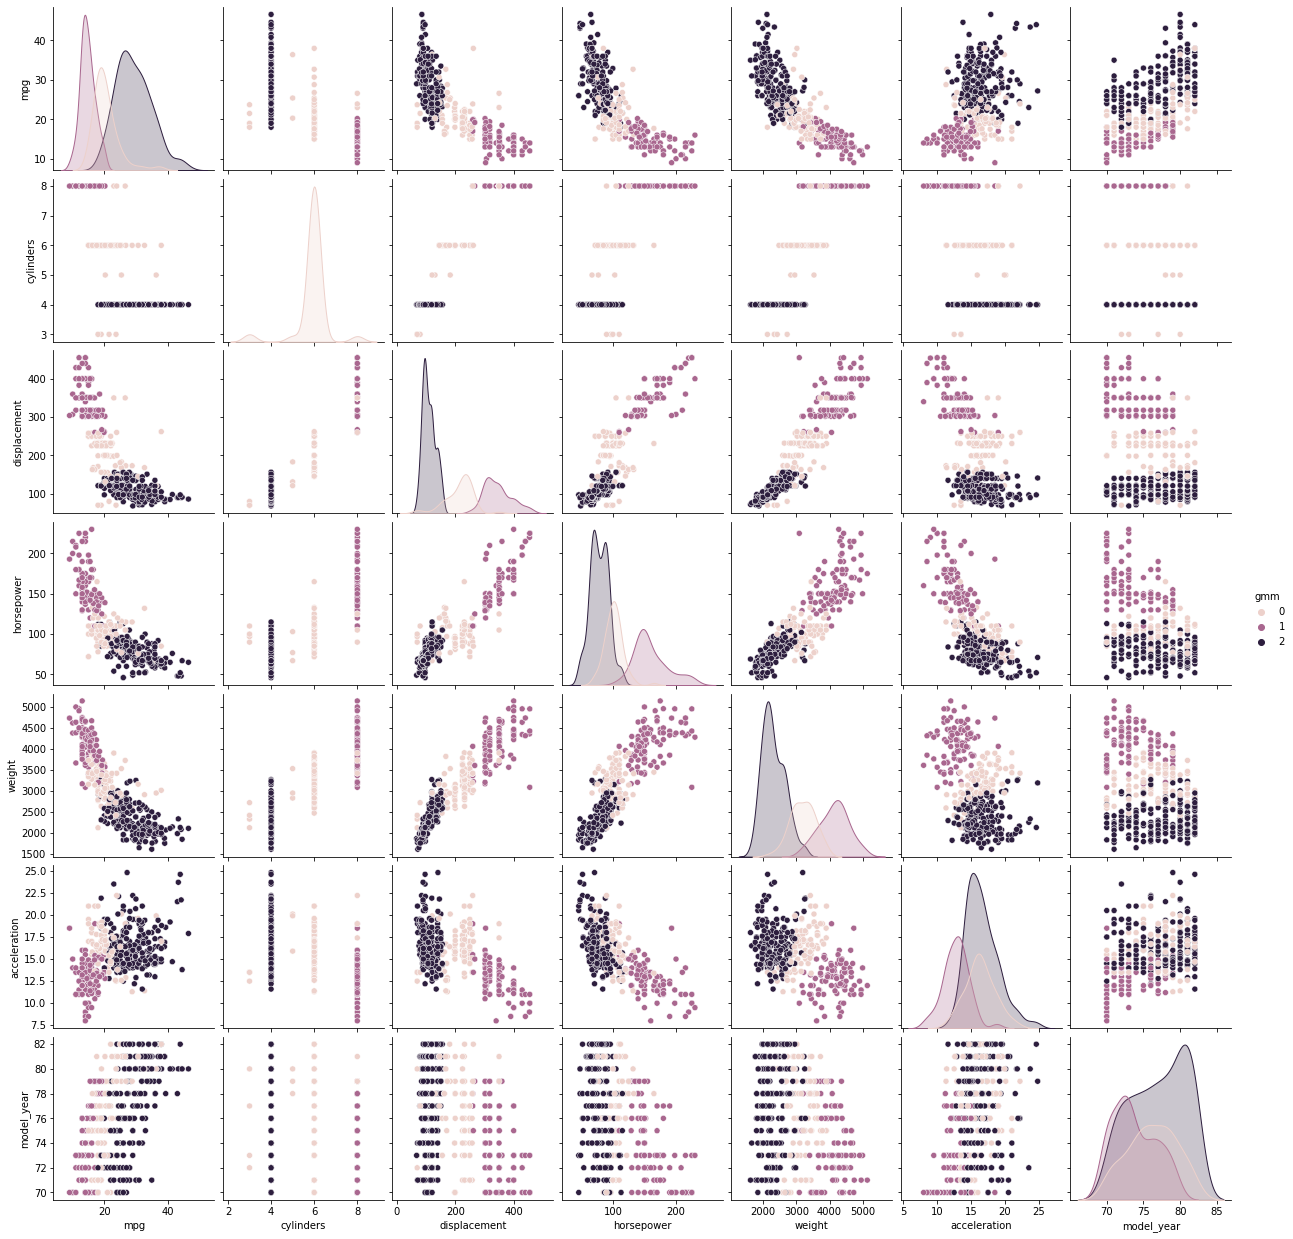

In [37]:
import seaborn as sns

df = mpg_num_nonans.copy()
df['gmm'] = clust_gmm
sns.pairplot(df,hue='gmm')


3. Calcular el Rand Adjusted Index para comparar el resultado del clustering con las etiquetas de clase de los datos originales (origin)

In [53]:
from sklearn.metrics.cluster import adjusted_rand_score

ARI_raw = adjusted_rand_score(y,clust_gmm)

print('ARI = {}'.format(ARI_raw))

ARI = 0.0576054745046738


Visualizamos los datos con las etiquetas de clase originales (GT) 

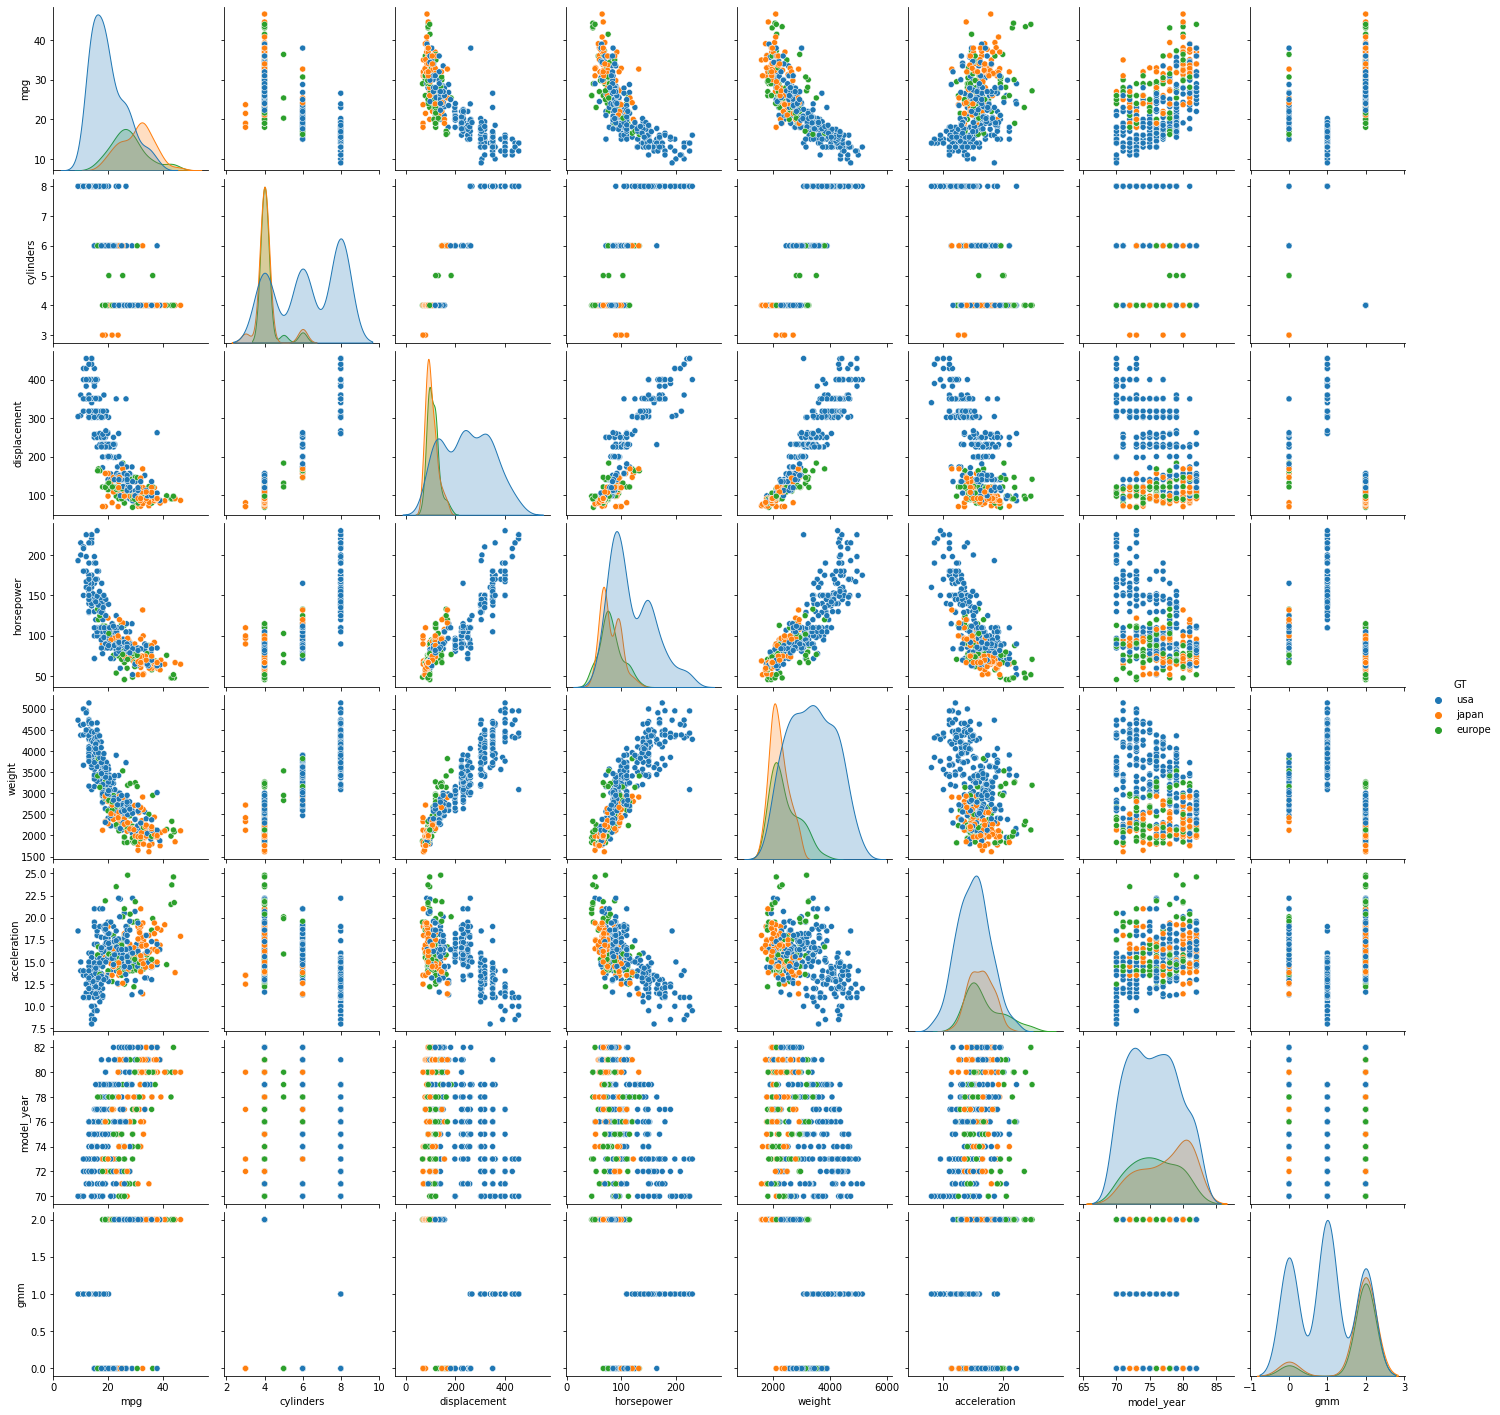

In [40]:
df['GT'] = y
sns.pairplot(df,hue='GT')


4. Aplicar PCA a mpg y obtener la proyección de los datos en el espacio PCA de dimensionalidad reducida

varianza explicada acumulada =[ 71.58051179  83.94610315  94.35172845  96.97908694  98.72074871
  99.49585101 100.        ]
Dimensionalidad datos en espacio PCA reducido = (392, 3)


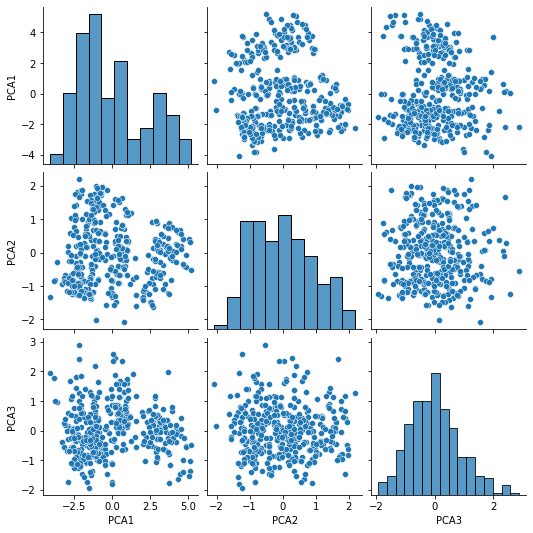

In [30]:
import pandas as pd 
import seaborn as sns

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = mpg_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 3 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
sns.pairplot(d)
plt.show()


5. Aplicar GMM a los datos PCA de dimensionalidad reducida y visualizar con un pairplot

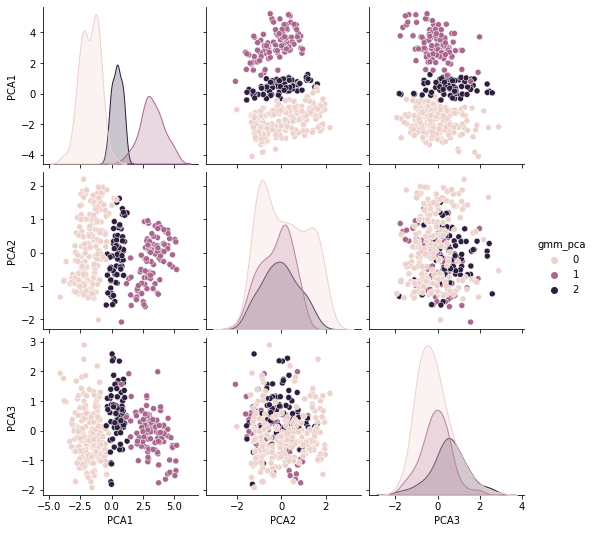

In [54]:
from sklearn import mixture
import matplotlib.pyplot as plt

clust_gmm_pca = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(XPCA)

df1 = d.copy()
df1['gmm_pca'] = clust_gmm_pca
sns.pairplot(df1,hue='gmm_pca')


6. Calcular el Rand Adjusted Index para comparar el resultado del clustering trs PCA con las etiquetas de clase de los datos originales (origin)


In [55]:
from sklearn.metrics.cluster import adjusted_rand_score

ARI_pca = adjusted_rand_score(y,clust_gmm_pca)

print('ARI PCA = {}'.format(ARI_pca))

ARI PCA = 0.05431135246414642


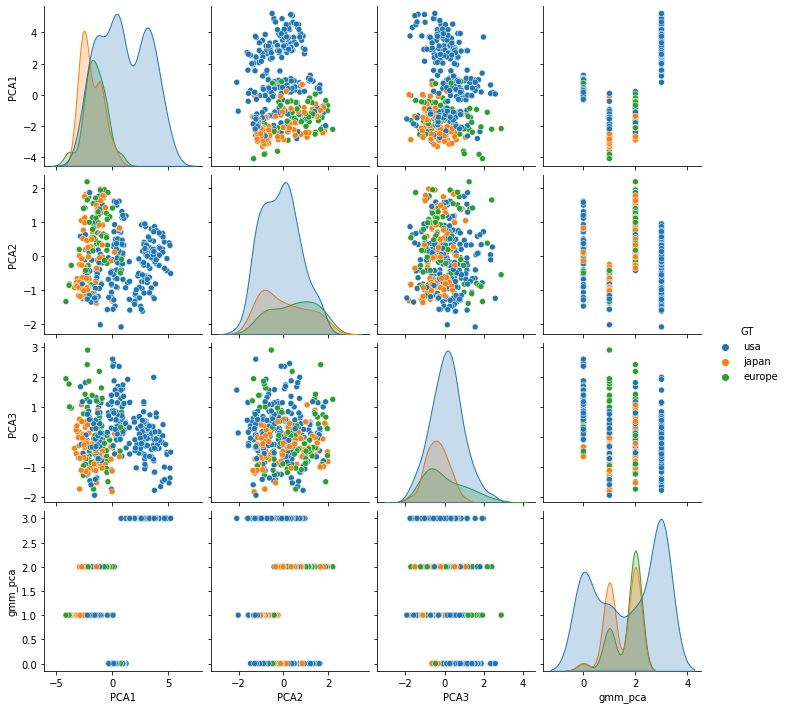

In [34]:
df1['GT'] = y
sns.pairplot(df1,hue='GT')